In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
import sys
import matplotlib.pyplot as plt
modules_path = '/content/drive/MyDrive/ColabNotebooks'
if(sys.path[-1] != modules_path):
  sys.path.append(modules_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from dl_models import NNType, get_nn_model
from image_importer import import_class_imgs
import numpy as np

def plot_training_history(hist, name):
    if(hist is not None) :
        fig, (ax1, ax2) = plt.subplots(1,2,figsize = (30,10), dpi=100)
        fig.suptitle(name)
        ax1.set_title('Loss')
        ax1.set_ylabel("Loss (training and validation)")
        ax1.set_xlabel("Training Steps")
        ax1.set_ylim([0,2])
        ax1.plot(hist["loss"], label = "Training set loss")
        ax1.plot(hist["val_loss"], label = "Validation set loss")
        ax1.grid()
        ax1.legend()


        ax2.set_title('Accuracy')
        ax2.set_ylabel("Accuracy (training and validation)")
        ax2.set_
        ax2.set_xlabel("Training Steps")
        ax2.set_ylim([0,1.1])
        ax2.set_xticks(np.arange(0, 1, step=0.2))
        ax2.plot(hist["categorical_accuracy"], label = "Training set accuracy")
        ax2.plot(hist["val_categorical_accuracy"], label = "Validation set loss")
        ax2.grid()
        ax2.legend()


retrain = True

In [3]:
dir_path = '/content/drive/MyDrive/ColabNotebooks'
base_path = f'{dir_path}/data/images/'
models_path = f'{dir_path}/data/models/'


In [4]:
 
classes = os.listdir(base_path)

hists = dict()
for nn_type in list(NNType)[1:]:
    print(nn_type)
    x_train, y_train = import_class_imgs(base_path, classes, nn_type)
    model, hist = get_nn_model(x_train, y_train, nn_type, classes, retrain, models_path)
    hists[nn_type.name] = hist



NNType.VGG16
Found 582 images belonging to 4 classes.
Epoch 1/50
1/1 - 76s - loss: 4.9361 - categorical_accuracy: 0.3371 - val_loss: 3.1785 - val_categorical_accuracy: 0.3333 - 76s/epoch - 76s/step
Epoch 2/50
1/1 - 65s - loss: 3.8780 - categorical_accuracy: 0.2921 - val_loss: 2.6177 - val_categorical_accuracy: 0.2821 - 65s/epoch - 65s/step
Epoch 3/50
1/1 - 66s - loss: 3.0262 - categorical_accuracy: 0.3483 - val_loss: 2.3552 - val_categorical_accuracy: 0.2308 - 66s/epoch - 66s/step
Epoch 4/50
1/1 - 65s - loss: 3.2946 - categorical_accuracy: 0.3258 - val_loss: 1.9803 - val_categorical_accuracy: 0.3333 - 65s/epoch - 65s/step
Epoch 5/50
1/1 - 67s - loss: 1.8375 - categorical_accuracy: 0.4494 - val_loss: 1.6022 - val_categorical_accuracy: 0.4359 - 67s/epoch - 67s/step
Epoch 6/50
1/1 - 66s - loss: 2.5898 - categorical_accuracy: 0.4494 - val_loss: 1.2577 - val_categorical_accuracy: 0.5385 - 66s/epoch - 66s/step
Epoch 7/50
1/1 - 66s - loss: 1.4693 - categorical_accuracy: 0.5506 - val_loss: 1.0

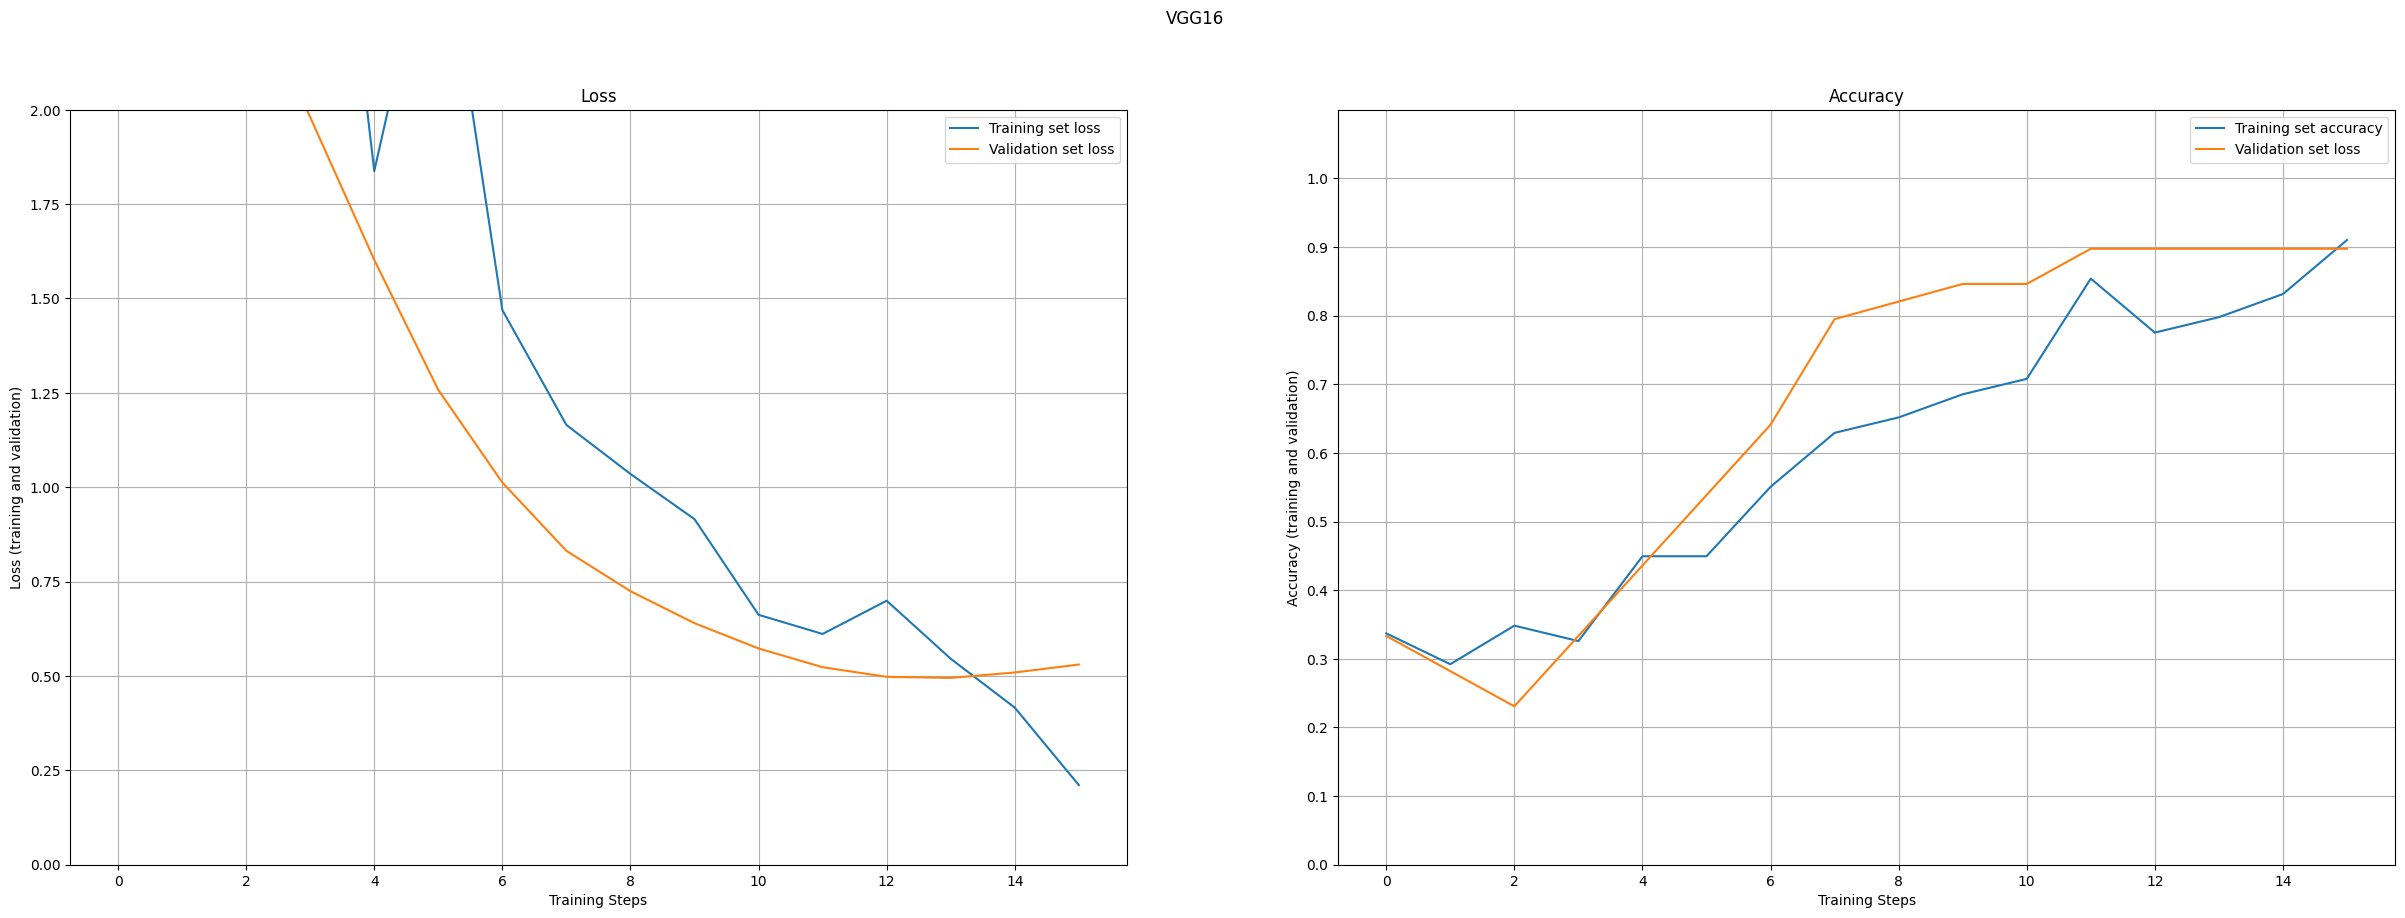

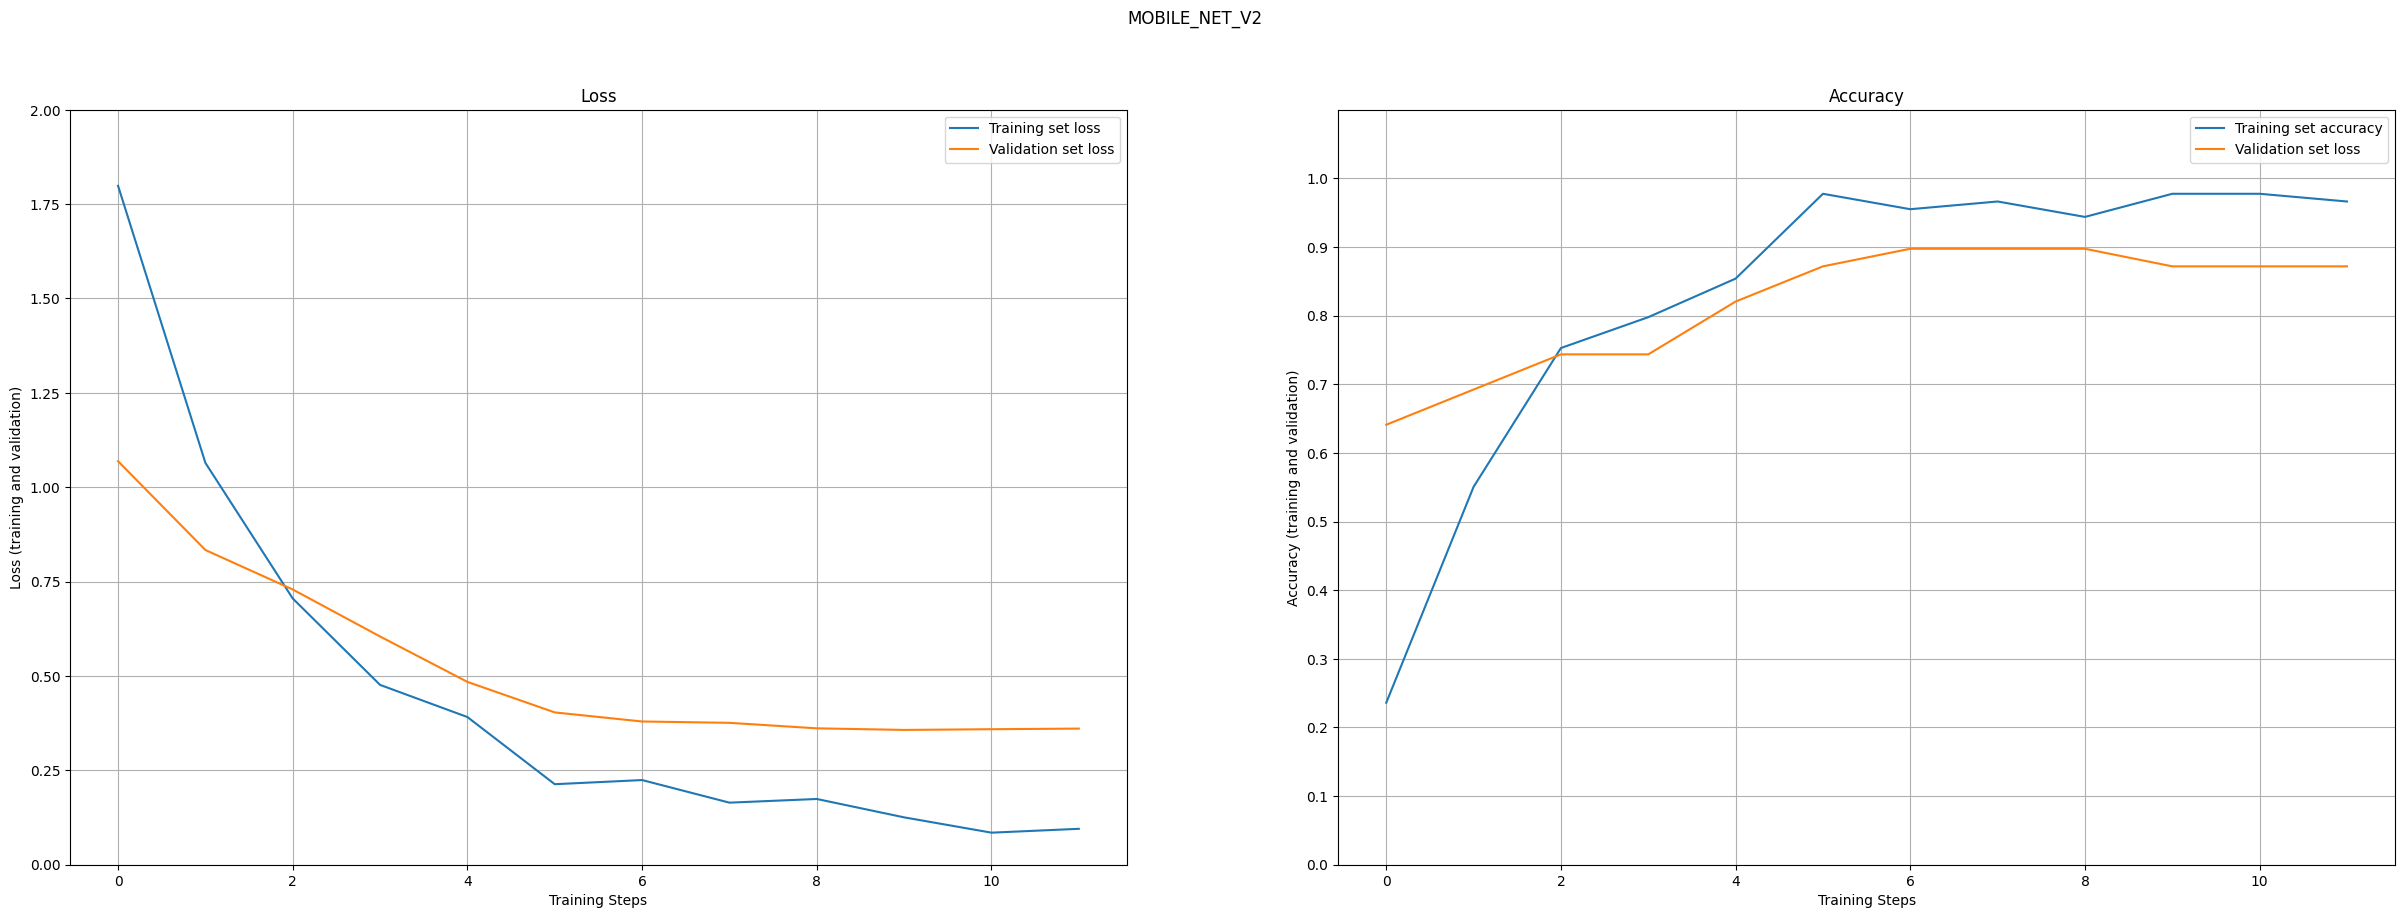

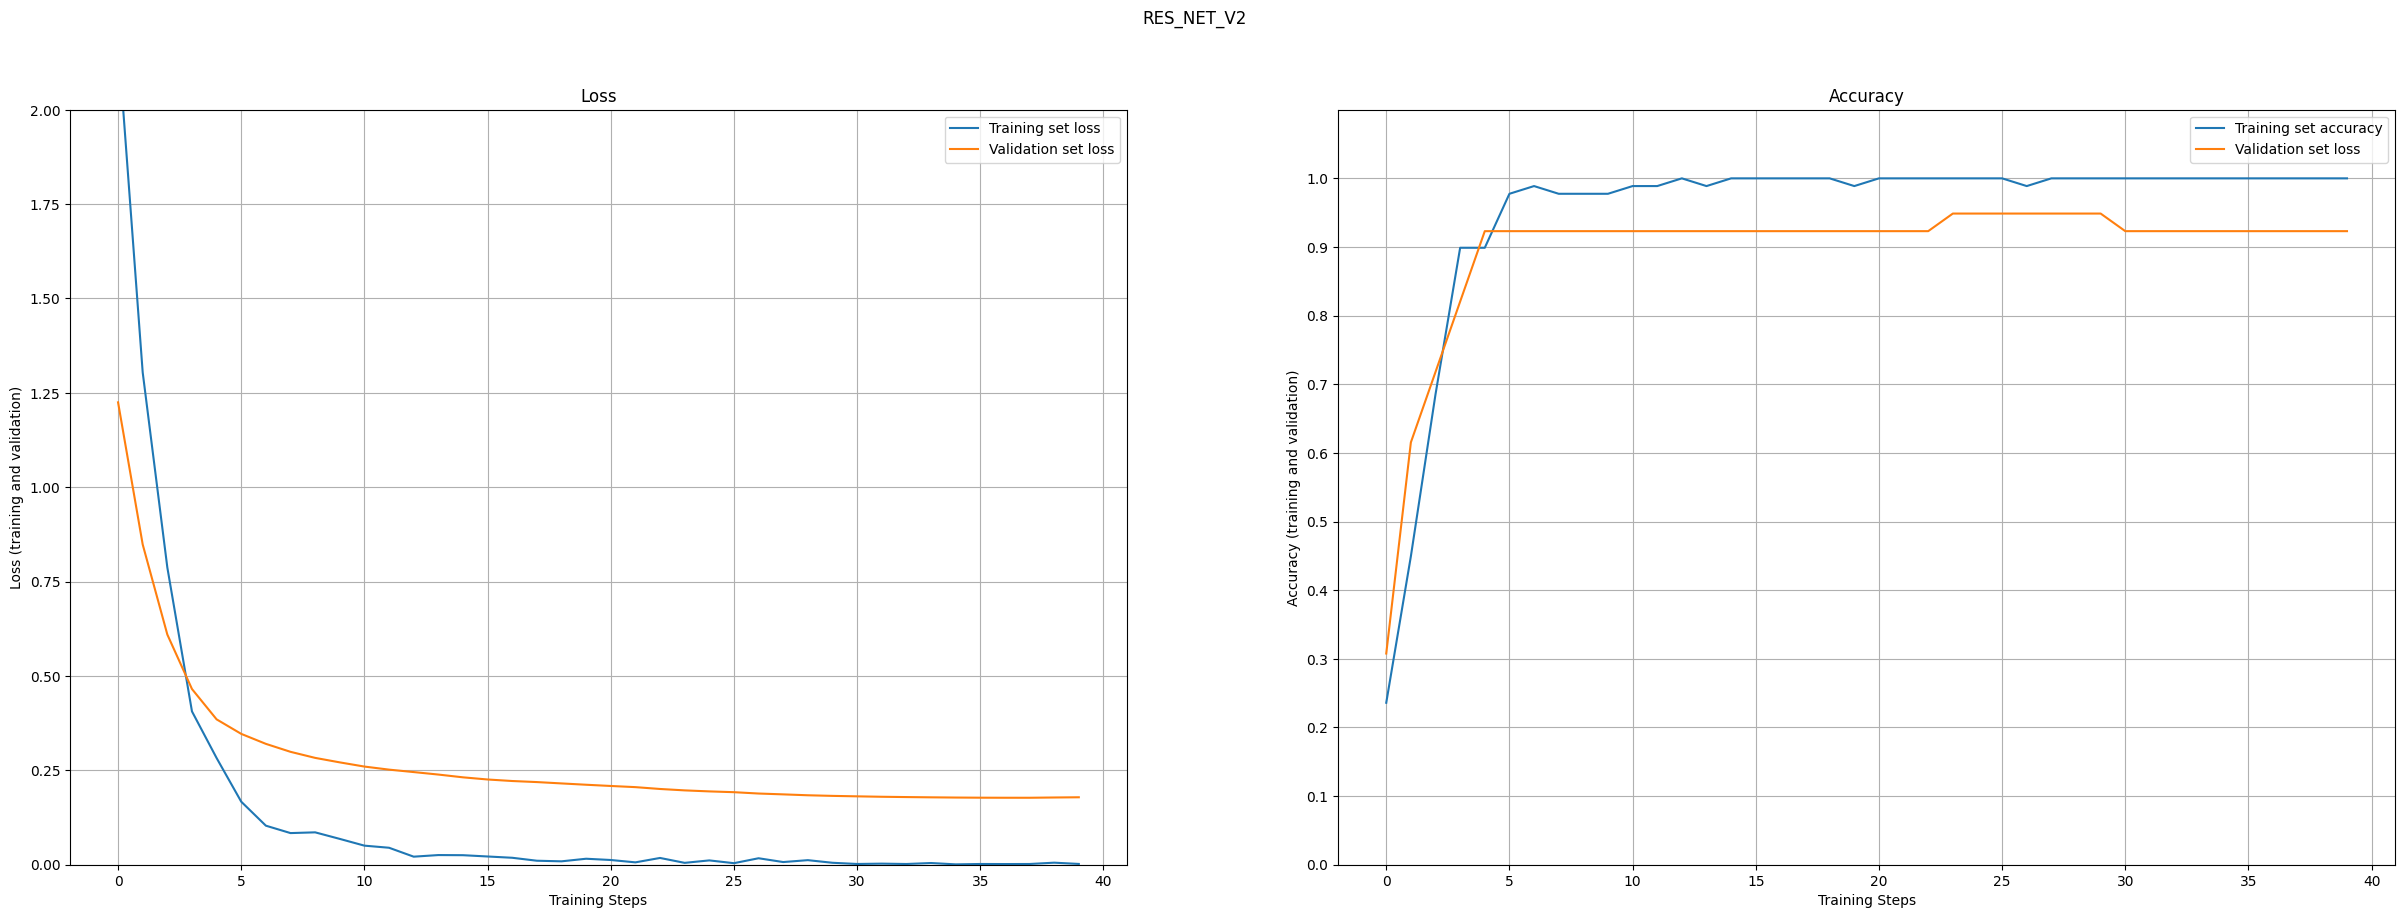

In [9]:
for hist in hists:
  plot_training_history(hists[hist], hist)
